In [16]:
import pandas as pd
import numpy as np



In [17]:
train_data = pd.read_csv("/kaggle/input/training/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test_data=pd.read_csv("/kaggle/input/testing/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
train_data = train_data.dropna()

In [20]:
women_survived = train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 1)]
count_women = len(women_survived)
print(count_women)

82


In [21]:
men_survived = train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 1)]
count_men = men_survived.shape[0]
print(count_men)

41


In [22]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

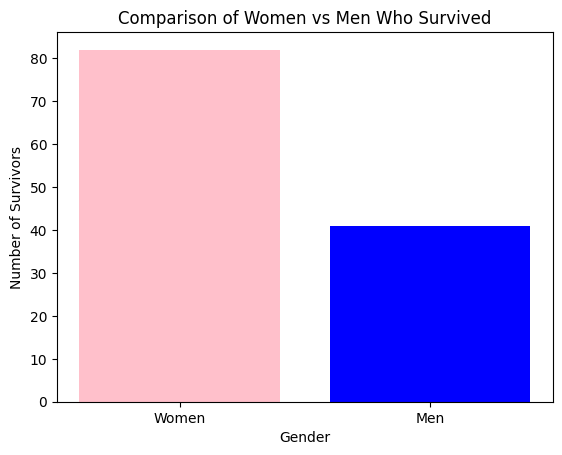

In [23]:
import matplotlib.pyplot as plt

# Data preparation
categories = ['Women', 'Men']
counts = [len(train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 1)]),
          len(train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 1)])]

# Create the bar chart
plt.bar(categories, counts, color=['pink', 'blue'])
plt.title('Comparison of Women vs Men Who Survived')
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.show()

thus more no of women survived as compared to men


/tmp/ipykernel_30/3616275448.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survivors['Age Range'] = pd.cut(survivors['Age'], bins=bins, labels=labels, right=False)


Age Range
0-10      8
11-20    15
21-30    27
31-40    37
41-50    19
51-60    13
61-70     3
71-80     0
81-90     1
Name: count, dtype: int64


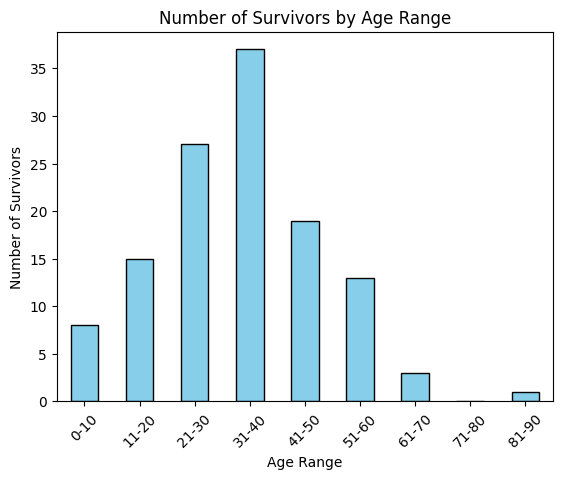

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming train_data is already loaded as a DataFrame
# Filter only survivors
survivors = train_data[train_data['Survived'] == 1]

# Define age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Create a new column for age range
survivors['Age Range'] = pd.cut(survivors['Age'], bins=bins, labels=labels, right=False)

# Count the number of survivors in each age range
age_range_counts = survivors['Age Range'].value_counts().sort_index()

# Print the results
print(age_range_counts)

# Plot the data
age_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Survivors by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=45)
plt.show()

thus the age ranges from 20-40 were most likely to survive, older ages did not survive, younger ages comparitively still survived.

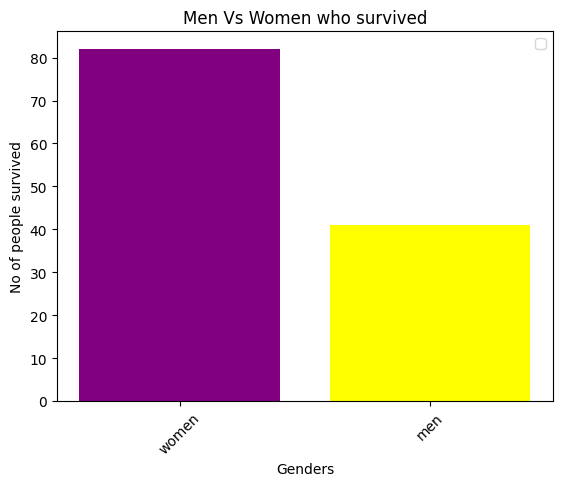

In [25]:
import matplotlib.pyplot as plt

#preparing the data
categories = ['women','men'] #the two things we wanna plot
counts = counts = [len(train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 1)]),
          len(train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 1)])]

plt.bar(categories,counts, color = ['purple','yellow'])
plt.title("Men Vs Women who survived")
plt.xlabel("Genders")
plt.ylabel("No of people survived")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [26]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

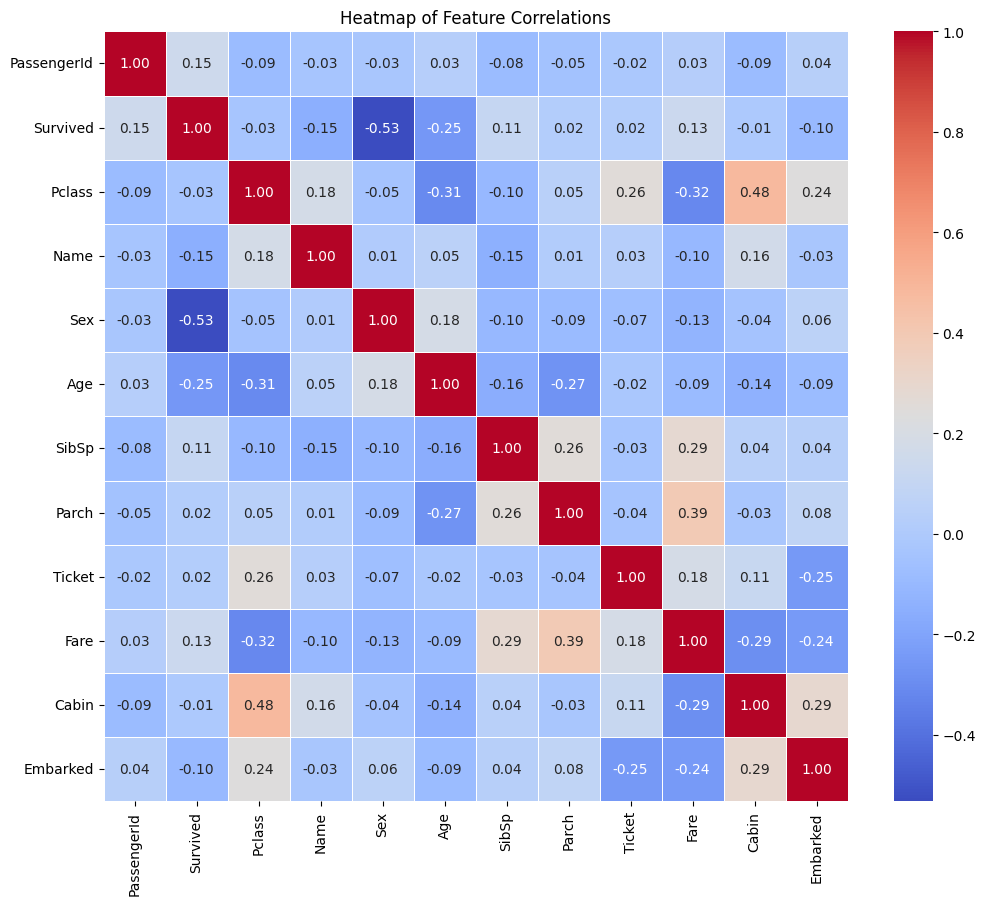

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_data is already loaded as a DataFrame
# 1. Identify categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

# 2. Encoding categorical columns
# 2.1. For Ordinal Categorical Data: Label Encoding
# You can choose specific columns based on domain knowledge
# Example: If 'Age' or 'Education' are ordinal, you can use Label Encoding

# Example: Label Encoding (use for ordered categories like 'low', 'medium', 'high')
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_cols:
    if train_data[col].dtype == 'object':
        train_data[col] = label_encoder.fit_transform(train_data[col])

# 2.2. For Nominal Categorical Data: One-Hot Encoding
# One-Hot Encoding creates binary columns for each category in the original column
train_data = pd.get_dummies(train_data, drop_first=True)  # Drop the first column to avoid multicollinearity

# 3. Compute the Correlation Matrix for all numerical data
correlation_matrix = train_data.corr()

# 4. Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Titles and labels
plt.title('Heatmap of Feature Correlations')
plt.show()

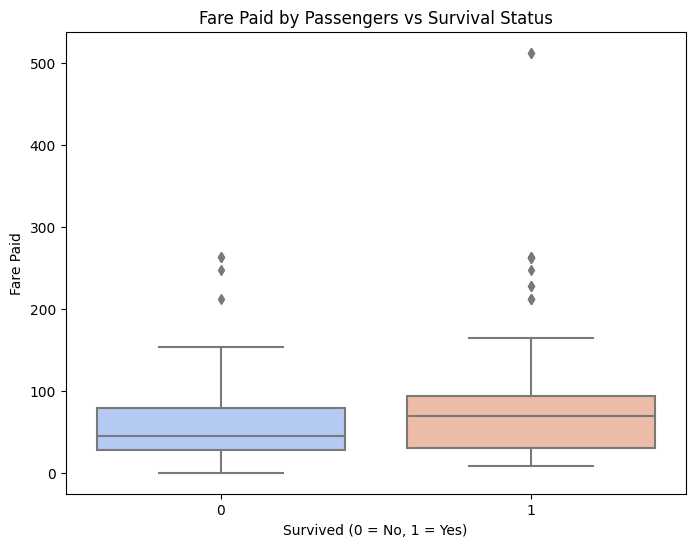

/tmp/ipykernel_30/1981878312.py:15: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Survived', y='Fare', data=train_data, jitter=True, palette='viridis', alpha=0.6)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  d

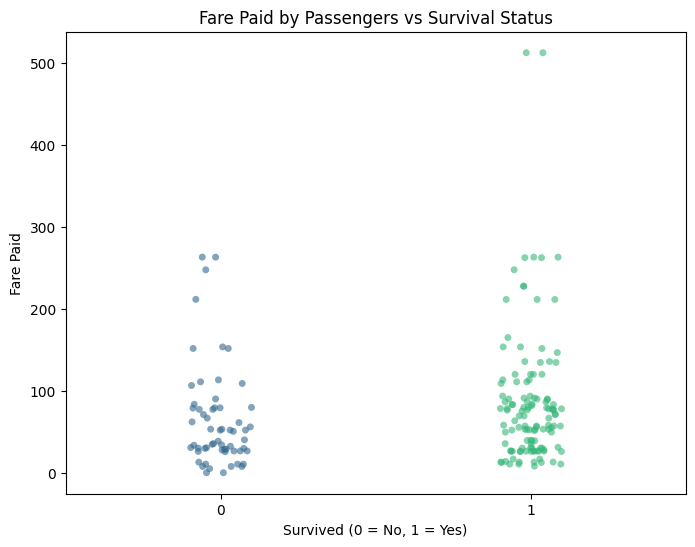

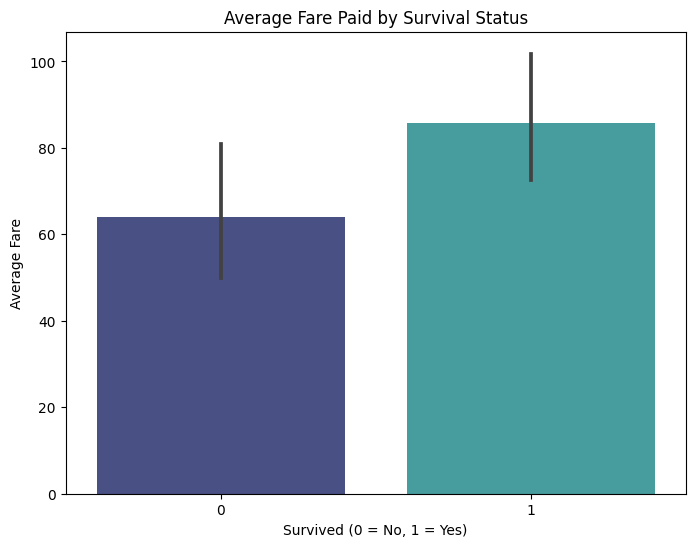

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Option 1: Boxplot to show fare distribution for survivors and non-survivors
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=train_data, palette='coolwarm')
plt.title('Fare Paid by Passengers vs Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare Paid')
plt.show()

# Option 2: Scatter plot to visualize fare vs survival
plt.figure(figsize=(8, 6))
sns.stripplot(x='Survived', y='Fare', data=train_data, jitter=True, palette='viridis', alpha=0.6)
plt.title('Fare Paid by Passengers vs Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare Paid')
plt.show()

# Option 3: Bar plot showing average fare paid by survival status
plt.figure(figsize=(8, 6))
sns.barplot(x='Survived', y='Fare', data=train_data, palette='mako')
plt.title('Average Fare Paid by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Average Fare')
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Target variable
y = train_data["Survived"].astype(int)

# Features to use
features = ["Pclass", "Sex", "SibSp", "Parch"]

# Convert categorical data to dummy variables
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Ensure columns match between X and X_test
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# Check for missing values and fill them
X = X.fillna(0)
X_test = X_test.fillna(0)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

# Predict on the test data
predictions = model.predict(X_test)

# Create submission file
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Step 2: Prepare features (X) and target labels (y)
# Replace "Survived" with the name of your target column
X = train_data.drop(columns=["Survived"])  # Features
y = train_data["Survived"]                # Target labels

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
predictions = model.predict(X_test)

# Step 6: Evaluate Accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Step 7: Generate a Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Step 8: Generate a Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(cm)

# Step 9: Perform Cross-Validation (Optional)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("\nCross-Validated Accuracy:", cv_scores.mean())

Accuracy: 0.6756756756756757

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.36      0.45        14
           1       0.69      0.87      0.77        23

    accuracy                           0.68        37
   macro avg       0.66      0.61      0.61        37
weighted avg       0.67      0.68      0.65        37


Confusion Matrix:
[[ 5  9]
 [ 3 20]]

Cross-Validated Accuracy: 0.7045045045045045


In [37]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Data Preprocessing
# Replace missing values if any
train_data.fillna(train_data.median(), inplace=True)

# Encode categorical variables if necessary
data = pd.get_dummies(train_data, drop_first=True)

# Feature and Target Split
X = data.drop("Survived", axis=1)  # Replace 'target_column' with your target column name
y = data["Survived"]

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Optional: Scale features (Random Forest doesn't require scaling, but it helps for other models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=0,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate on Test Data
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': data.drop('Survived', axis=1).columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importances)

# Cross-Validation Accuracy
cross_val_acc = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validated Accuracy:", cross_val_acc.mean())

Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.87      0.80      0.83        25

    accuracy                           0.78        37
   macro avg       0.76      0.78      0.76        37
weighted avg       0.80      0.78      0.79        37

Confusion Matrix:
 [[ 9  3]
 [ 5 20]]
Accuracy: 0.7837837837837838
Feature Importances:
         Feature  Importance
3           Sex    0.305908
4           Age    0.146991
8          Fare    0.116810
2          Name    0.110575
0   PassengerId    0.094353
9         Cabin    0.093658
7        Ticket    0.078527
6         Parch    0.017883
5         SibSp    0.017590
1        Pclass    0.010211
10     Embarked    0.007491
Cross-Validated Accuracy: 0.7208708708708709
[CV] END class_weight=balanced, max_depth=10, 